<a href="https://colab.research.google.com/github/JavaFXpert/VizEmbeddings/blob/main/Viz_subjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load the dataset

The dataset used in this example is [fine-food reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews) from Amazon. The dataset contains a total of 568,454 food reviews Amazon users left up to October 2012. We will use a subset of this dataset, consisting of 1,000 most recent reviews for illustration purposes. The reviews are in English and tend to be positive or negative. Each review has a ProductId, UserId, Score, review title (Summary) and review body (Text).

We will combine the review summary and review text into a single combined text. The model will encode this combined text and it will output a single vector embedding.

To run this notebook, you will need to install: pandas, openai, transformers, plotly, matplotlib, scikit-learn, torch (transformer dep), torchvision, and scipy.

In [1]:
!pip install tiktoken
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 9.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 KB 1.7 MB/s eta 0:00:00
 

In [12]:
# imports
import pandas as pd
import tiktoken
import openai

from openai.embeddings_utils import get_embedding


In [13]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191


In [64]:
# load & inspect dataset

colors = [
["Natural Sciences", 0],
["Physics", 1],
["Chemistry", 1],
["Biology", 1],
["Earth Sciences", 1],
["Astronomy", 1],
["Environmental Science", 1],
["Social Sciences", 0],
["Sociology", 1],
["Psychology", 1],
["Political Science", 1],
["Economics", 1],
["Anthropology", 1],
["Geography", 1],
["Humanities", 0],
["History", 2],
["Literature", 2],
["Philosophy", 2],
["Religion", 2],
["Art", 2],
["Music", 2],
["Theatre", 2],
["Applied Sciences", 0],
["Engineering", 3],
["Technology", 3],
["Medicine", 3],
["Agriculture", 3],
["Architecture", 3],
["Environmental Management", 3],
["Mathematics", 0],
["Pure Mathematics", 4],
["Applied Mathematics", 4],
["Statistics", 4],
["Mathematical modeling", 4],
["Business and Finance", 0],
["Accounting", 5],
["Marketing", 5],
["Management", 5],
["Economics", 5],
["Banking and Finance", 5],
["International Business", 5],
["Law and Politics", 0],
["International Law", 6],
["Criminal Law", 6],
["Political Science", 6],
["Government and Public Administration", 6],
["Political Philosophy", 6],
["Languages and Communication", 0],
["Linguistics", 7],
["Literature", 7],
["Communication Studies", 7],
["Media Studies", 7],
["Translation and Interpretation", 7],
["Physical Sciences", 0],
["Mechanics", 8],
["Thermodynamics", 8],
["Electromagnetism", 8],
["Quantum Mechanics", 8],
["Life Sciences", 0],
["Botany", 9],
["Zoology", 9],
["Ecology", 9],
["Evolutionary Biology", 9],
["Genetics", 9],
["Biochemistry", 9],
["Environmental Sciences", 0],
["Meteorology", 10],
["Hydrology", 10],
["Oceanography", 10],
["Geology", 10],
["Soil Science", 10],
["Climatology", 10],
["Information Sciences and Technology", 0],
["Computer Science", 11],
["Information Systems", 11],
["Library Science", 11],
["Telecommunication", 11],
["Artificial Intelligence", 11],
["Education", 0],
["Pedagogy", 12],
["Curriculum Development", 12],
["Instructional Design", 12],
["Special Education", 12],
["Teacher Education", 12],
["Cultural Studies", 0],
["Cultural Anthropology", 13],
["Ethnology", 13],
["Folklore Studies", 13],
["Art History", 13],
["Archaeology", 13],
["Health Sciences", 0],
["Nursing", 14],
["Medicine", 14],
["Public Health", 14],
["Nutrition", 14],
["Environmental Health", 14],
["Political Sciences", 0],
["Public Administration", 15],
["Political Theory", 15],
["Comparative Politics", 15],
["International Relations", 15],
["Political Economy", 15],
["Psychology", 0],
["Social Psychology", 16],
["Cognitive Psychology", 16],
["Developmental Psychology", 16],
["Abnormal Psychology", 16],
["Neuropsychology", 16],
["Economics", 0],
["Microeconomics", 17],
["Macroeconomics", 17],
["Econometrics", 17],
["International Economics", 17],
["Agricultural Economics", 17],
["Philosophy", 0],
["Metaphysics", 18],
["Epistemology", 18],
["Logic", 18],
["Ethics", 18],
["Political Philosophy", 18],
["Spiritual and Religious Studies", 0],
["Theology", 19],
["Comparative Religion", 19],
["World Religions", 19],
["Mythology", 19],
["Religious Ethics", 19],
]

df = pd.DataFrame(colors, columns=['Colors', 'Index'])

df.head(20)


,Colors,Index
0,Natural Sciences,0
1,Physics,1
2,Chemistry,1
3,Biology,1
4,Earth Sciences,1
5,Astronomy,1
6,Environmental Science,1
7,Social Sciences,0
8,Sociology,1
9,Psychology,1


In [65]:
# subsample to 1k most recent reviews and remove samples that are too long
top_n = 1000
encoding = tiktoken.get_encoding(embedding_encoding)
len(df)

df["colors"] = (df.Colors)


## 2. Get embeddings and save them for future reuse

In [66]:
# Ensure you have your API key set in your environment per the README: https://github.com/openai/openai-python#usage
openai.api_key = 'sk-'

# This may take a few minutes
df["embedding"] = df.colors.apply(lambda x: get_embedding(x, engine=embedding_model))
df.to_csv("colors.csv")


In [67]:
from sklearn.manifold import TSNE
import numpy as np

# Load the embeddings
datafile_path = "colors.csv"
df = pd.read_csv(datafile_path)

# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(126, 2)

x: [-6.9619465, 46.290176, 34.92832, 25.316195, -4.528152, 14.107606, -13.747303, -1.6416699, -7.2386203, -7.168315, 56.63177, 42.10709, -14.375357, 7.137518, -5.037628, -78.47387, -45.873314, 18.108131, 2.2550015, -63.39341, -58.55052, -63.9796, -20.427212, -60.640125, -55.546135, 71.74936, 59.72137, -66.85413, -22.481089, -92.1948, -94.61951, -89.02415, -85.44836, -99.28424, 32.553425, 34.635212, -48.047714, -46.587795, 42.514164, 28.30166, 84.355804, 78.02758, 85.395256, 86.00467, 53.642662, -39.848236, 66.557755, -57.675358, -52.178467, -42.12395, -41.804516, -40.026115, -63.299145, -12.28156, 45.23317, 39.99713, 55.330112, 48.990036, -22.098726, 22.20241, 24.994354, 18.222902, 17.313509, 22.385105, 31.34246, -17.922848, 7.2169623, 10.51999, 0.6595833, 3.5656996, -13.056306, 3.2371047, -81.746346, -81.890175, -78.7238, -30.39285, -67.38915, -88.01299, -61.65692, -29.020775, -38.16004, -43.44615, -32.597923, -31.756891, -26.793753, -20.476604, -18.601032, -29.874222, -75.14908, -13.

Text(0.5, 1.0, 'Rainbow colors visualized in language using t-SNE')

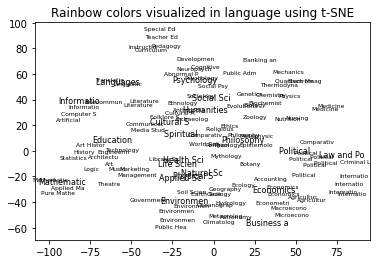

In [70]:
import matplotlib.pyplot as plt
import matplotlib

colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
x = [x for x,y in vis_dims]
print("x: " + str(x))
y = [y for x,y in vis_dims]
print("y: " + str(y))
color_indices = df.Index.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.0)
for i in range(len(x)):
    if df.Index[i] == 0:
        plt.annotate(df.Colors[i][:10], (x[i], y[i]), xytext=(0, 2), 
                    textcoords='offset points', ha='center', fontsize=8)
    else:
        plt.annotate(df.Colors[i][:10], (x[i], y[i]), xytext=(0, 2), 
                    textcoords='offset points', ha='center', fontsize=6)


# for index in [0, 1, 2, 3, 4, 5]:
#     avg_x = np.array(x)[df.Index-1==index].mean()
#     avg_y = np.array(y)[df.Index-1==index].mean()
#     color = colors[index]
#     plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)
#     print("avg_x:", avg_x, "avg_y:", avg_y)
#     if not pd.isna(avg_x) and not pd.isna(avg_y):
#         plt.text(avg_x+0.5, avg_y+0.5, "hi", fontsize=12)
#         plt.text(0.5, 0.5, "lo", fontsize=12)

plt.title("Rainbow colors visualized in language using t-SNE")